In [1]:
import matplotlib.pylab as plt
import time
import keras
from keras.datasets import mnist,cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU, Conv2D,MaxPool2D,Flatten,Dropout
from keras.optimizers import RMSprop
from keras import backend as K
K.tensorflow_backend._get_available_gpus()
from matplotlib.pyplot import imshow
import numpy as np

Using TensorFlow backend.


In [2]:
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

# Mnist DNN

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((x_train.shape[0],x_train.shape[1]*x_train.shape[1]))
x_test = x_test.reshape((x_test.shape[0],x_test.shape[1]*x_test.shape[1]))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [4]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [38]:
model1_0 = Sequential()
model1_0.add(Dense(5, activation='relu',kernel_initializer='normal', input_dim=784))
model1_0.add(Dense(10,kernel_initializer='normal', activation='softmax'))
print(model1_0.count_params())

model1_1 = Sequential()
model1_1.add(Dense(5, activation='relu',kernel_initializer='normal', input_dim=784))
model1_1.add(Dense(5,kernel_initializer='normal', activation='relu'))
model1_1.add(Dense(10,kernel_initializer='normal', activation='softmax'))
print(model1_1.count_params())

3985
4015


In [39]:
model2_0 = Sequential()
model2_0.add(Dense(10,kernel_initializer='normal', activation='relu', input_dim=784))
model2_0.add(Dense(10,kernel_initializer='normal', activation='softmax'))
print(model2_0.count_params())

model2_1 = Sequential()
model2_1.add(Dense(10,kernel_initializer='normal', activation='relu', input_dim=784))
model2_1.add(Dense(15,kernel_initializer='normal', activation='relu'))
model2_1.add(Dense(20,kernel_initializer='normal', activation='relu'))
model2_1.add(Dense(15,kernel_initializer='normal', activation='relu'))
model2_1.add(Dense(10,kernel_initializer='normal', activation='softmax'))
print(model2_1.count_params())

7960
8810


In [40]:
model3_0 = Sequential()
model3_0.add(Dense(20,kernel_initializer='normal', activation='relu', input_dim=784))
model3_0.add(Dense(10,kernel_initializer='normal', activation='softmax'))
print(model3_0.count_params())

model3_1 = Sequential()
model3_1.add(Dense(15,kernel_initializer='normal', activation='relu', input_dim=784))
model3_1.add(Dense(30,kernel_initializer='normal', activation='relu'))
model3_1.add(Dense(30,kernel_initializer='normal', activation='relu'))
model3_1.add(Dense(30,kernel_initializer='normal', activation='relu'))
model3_1.add(Dense(30,kernel_initializer='normal', activation='relu'))
model3_1.add(Dense(21,kernel_initializer='normal', activation='relu'))
model3_1.add(Dense(10,kernel_initializer='normal', activation='softmax'))
print(model3_1.count_params())

15910
15916


In [41]:
model1_0.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model1_1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model2_0.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model2_1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model3_0.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model3_1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [44]:
start = time.time()
batch_size = 500
epochs = 100
history1_0 = model1_0.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
history1_1 = model1_1.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
history2_0 = model2_0.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
history2_1 = model2_1.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
history3_0 = model3_0.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
history3_1 = model3_1.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
end = time.time()
print((end - start)/60)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 0s 5us/step - loss: 0.3481 - acc: 0.8990 - val_loss: 0.3607 - val_acc: 0.8953
Epoch 2/100
60000/60000 [==============================] - 0s 4us/step - loss: 0.3477 - acc: 0.8993 - val_loss: 0.3598 - val_acc: 0.8964
Epoch 3/100
60000/60000 [==============================] - 0s 4us/step - loss: 0.3469 - acc: 0.8998 - val_loss: 0.3602 - val_acc: 0.8961
Epoch 4/100
60000/60000 [==============================] - 0s 4us/step - loss: 0.3468 - acc: 0.9000 - val_loss: 0.3595 - val_acc: 0.8968
Epoch 5/100
60000/60000 [==============================] - 0s 4us/step - loss: 0.3458 - acc: 0.9006 - val_loss: 0.3598 - val_acc: 0.8965
Epoch 6/100
60000/60000 [==============================] - 0s 4us/step - loss: 0.3453 - acc: 0.9005 - val_loss: 0.3605 - val_acc: 0.8964
Epoch 7/100
60000/60000 [==============================] - 0s 4us/step - loss: 0.3451 - acc: 0.9013 - val_loss: 0.3587 - val_acc

60000/60000 [==============================] - 0s 4us/step - loss: 0.3301 - acc: 0.9057 - val_loss: 0.3550 - val_acc: 0.9000
Epoch 61/100
60000/60000 [==============================] - 0s 4us/step - loss: 0.3302 - acc: 0.9060 - val_loss: 0.3545 - val_acc: 0.8993
Epoch 62/100
60000/60000 [==============================] - 0s 4us/step - loss: 0.3298 - acc: 0.9062 - val_loss: 0.3547 - val_acc: 0.8995
Epoch 63/100
60000/60000 [==============================] - 0s 4us/step - loss: 0.3299 - acc: 0.9063 - val_loss: 0.3545 - val_acc: 0.9009
Epoch 64/100
60000/60000 [==============================] - 0s 4us/step - loss: 0.3301 - acc: 0.9050 - val_loss: 0.3571 - val_acc: 0.8984
Epoch 65/100
60000/60000 [==============================] - 0s 5us/step - loss: 0.3294 - acc: 0.9060 - val_loss: 0.3562 - val_acc: 0.8999
Epoch 66/100
60000/60000 [==============================] - 0s 4us/step - loss: 0.3292 - acc: 0.9070 - val_loss: 0.3568 - val_acc: 0.9001
Epoch 67/100
60000/60000 [=====================

60000/60000 [==============================] - 0s 5us/step - loss: 0.3884 - acc: 0.8896 - val_loss: 0.4107 - val_acc: 0.8803
Epoch 20/100
60000/60000 [==============================] - 0s 5us/step - loss: 0.3883 - acc: 0.8888 - val_loss: 0.4108 - val_acc: 0.8820
Epoch 21/100
60000/60000 [==============================] - 0s 5us/step - loss: 0.3875 - acc: 0.8895 - val_loss: 0.4101 - val_acc: 0.8832
Epoch 22/100
60000/60000 [==============================] - 0s 5us/step - loss: 0.3871 - acc: 0.8898 - val_loss: 0.4089 - val_acc: 0.8832
Epoch 23/100
60000/60000 [==============================] - 0s 5us/step - loss: 0.3873 - acc: 0.8892 - val_loss: 0.4105 - val_acc: 0.8813
Epoch 24/100
60000/60000 [==============================] - 0s 5us/step - loss: 0.3860 - acc: 0.8896 - val_loss: 0.4102 - val_acc: 0.8836
Epoch 25/100
60000/60000 [==============================] - 0s 5us/step - loss: 0.3858 - acc: 0.8898 - val_loss: 0.4106 - val_acc: 0.8832
Epoch 26/100
60000/60000 [=====================

60000/60000 [==============================] - 0s 5us/step - loss: 0.3726 - acc: 0.8937 - val_loss: 0.4066 - val_acc: 0.8845
Epoch 79/100
60000/60000 [==============================] - 0s 5us/step - loss: 0.3712 - acc: 0.8938 - val_loss: 0.4103 - val_acc: 0.8833
Epoch 80/100
60000/60000 [==============================] - 0s 5us/step - loss: 0.3712 - acc: 0.8941 - val_loss: 0.4095 - val_acc: 0.8849
Epoch 81/100
60000/60000 [==============================] - 0s 5us/step - loss: 0.3718 - acc: 0.8941 - val_loss: 0.4087 - val_acc: 0.8847
Epoch 82/100
60000/60000 [==============================] - 0s 5us/step - loss: 0.3717 - acc: 0.8939 - val_loss: 0.4074 - val_acc: 0.8851
Epoch 83/100
60000/60000 [==============================] - 0s 5us/step - loss: 0.3709 - acc: 0.8941 - val_loss: 0.4068 - val_acc: 0.8849
Epoch 84/100
60000/60000 [==============================] - 0s 5us/step - loss: 0.3709 - acc: 0.8944 - val_loss: 0.4079 - val_acc: 0.8856
Epoch 85/100
60000/60000 [=====================

60000/60000 [==============================] - 0s 4us/step - loss: 0.1693 - acc: 0.9516 - val_loss: 0.2146 - val_acc: 0.9375
Epoch 38/100
60000/60000 [==============================] - 0s 4us/step - loss: 0.1690 - acc: 0.9510 - val_loss: 0.2120 - val_acc: 0.9371
Epoch 39/100
60000/60000 [==============================] - 0s 4us/step - loss: 0.1688 - acc: 0.9518 - val_loss: 0.2132 - val_acc: 0.9371
Epoch 40/100
60000/60000 [==============================] - 0s 4us/step - loss: 0.1684 - acc: 0.9518 - val_loss: 0.2131 - val_acc: 0.9370
Epoch 41/100
60000/60000 [==============================] - 0s 5us/step - loss: 0.1681 - acc: 0.9512 - val_loss: 0.2166 - val_acc: 0.9378
Epoch 42/100
60000/60000 [==============================] - 0s 5us/step - loss: 0.1678 - acc: 0.9519 - val_loss: 0.2137 - val_acc: 0.9382
Epoch 43/100
60000/60000 [==============================] - 0s 4us/step - loss: 0.1676 - acc: 0.9520 - val_loss: 0.2138 - val_acc: 0.9392
Epoch 44/100
60000/60000 [=====================

60000/60000 [==============================] - 0s 4us/step - loss: 0.1551 - acc: 0.9548 - val_loss: 0.2182 - val_acc: 0.9381
Epoch 97/100
60000/60000 [==============================] - 0s 5us/step - loss: 0.1547 - acc: 0.9552 - val_loss: 0.2201 - val_acc: 0.9378
Epoch 98/100
60000/60000 [==============================] - 0s 4us/step - loss: 0.1553 - acc: 0.9549 - val_loss: 0.2189 - val_acc: 0.9379
Epoch 99/100
60000/60000 [==============================] - 0s 5us/step - loss: 0.1543 - acc: 0.9548 - val_loss: 0.2228 - val_acc: 0.9373
Epoch 100/100
60000/60000 [==============================] - 0s 4us/step - loss: 0.1543 - acc: 0.9552 - val_loss: 0.2245 - val_acc: 0.9386
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 0s 6us/step - loss: 0.2433 - acc: 0.9311 - val_loss: 0.2798 - val_acc: 0.9204
Epoch 2/100
60000/60000 [==============================] - 0s 6us/step - loss: 0.2409 - acc: 0.9316 - val_loss: 0.2794 - val_acc: 0.921

60000/60000 [==============================] - 0s 6us/step - loss: 0.1791 - acc: 0.9492 - val_loss: 0.2479 - val_acc: 0.9321
Epoch 56/100
60000/60000 [==============================] - 0s 6us/step - loss: 0.1779 - acc: 0.9497 - val_loss: 0.2496 - val_acc: 0.9321
Epoch 57/100
60000/60000 [==============================] - 0s 6us/step - loss: 0.1785 - acc: 0.9492 - val_loss: 0.2526 - val_acc: 0.9316
Epoch 58/100
60000/60000 [==============================] - 0s 6us/step - loss: 0.1781 - acc: 0.9493 - val_loss: 0.2590 - val_acc: 0.9314
Epoch 59/100
60000/60000 [==============================] - 0s 6us/step - loss: 0.1775 - acc: 0.9499 - val_loss: 0.2451 - val_acc: 0.9335
Epoch 60/100
60000/60000 [==============================] - 0s 6us/step - loss: 0.1760 - acc: 0.9502 - val_loss: 0.2458 - val_acc: 0.9340
Epoch 61/100
60000/60000 [==============================] - 0s 6us/step - loss: 0.1760 - acc: 0.9498 - val_loss: 0.2505 - val_acc: 0.9336
Epoch 62/100
60000/60000 [=====================

60000/60000 [==============================] - 0s 5us/step - loss: 0.0902 - acc: 0.9735 - val_loss: 0.1445 - val_acc: 0.9580
Epoch 15/100
60000/60000 [==============================] - 0s 4us/step - loss: 0.0897 - acc: 0.9736 - val_loss: 0.1425 - val_acc: 0.9591
Epoch 16/100
60000/60000 [==============================] - 0s 4us/step - loss: 0.0891 - acc: 0.9744 - val_loss: 0.1438 - val_acc: 0.9585
Epoch 17/100
60000/60000 [==============================] - 0s 5us/step - loss: 0.0883 - acc: 0.9744 - val_loss: 0.1446 - val_acc: 0.9582
Epoch 18/100
60000/60000 [==============================] - 0s 4us/step - loss: 0.0877 - acc: 0.9747 - val_loss: 0.1427 - val_acc: 0.9592
Epoch 19/100
60000/60000 [==============================] - 0s 4us/step - loss: 0.0866 - acc: 0.9752 - val_loss: 0.1433 - val_acc: 0.9586
Epoch 20/100
60000/60000 [==============================] - 0s 4us/step - loss: 0.0859 - acc: 0.9750 - val_loss: 0.1438 - val_acc: 0.9590
Epoch 21/100
60000/60000 [=====================

60000/60000 [==============================] - 0s 5us/step - loss: 0.0608 - acc: 0.9828 - val_loss: 0.1585 - val_acc: 0.9574
Epoch 74/100
60000/60000 [==============================] - 0s 5us/step - loss: 0.0604 - acc: 0.9828 - val_loss: 0.1612 - val_acc: 0.9574
Epoch 75/100
60000/60000 [==============================] - 0s 4us/step - loss: 0.0603 - acc: 0.9826 - val_loss: 0.1578 - val_acc: 0.9579
Epoch 76/100
60000/60000 [==============================] - 0s 4us/step - loss: 0.0600 - acc: 0.9831 - val_loss: 0.1593 - val_acc: 0.9572
Epoch 77/100
60000/60000 [==============================] - 0s 5us/step - loss: 0.0596 - acc: 0.9834 - val_loss: 0.1580 - val_acc: 0.9576
Epoch 78/100
60000/60000 [==============================] - 0s 4us/step - loss: 0.0593 - acc: 0.9834 - val_loss: 0.1592 - val_acc: 0.9573
Epoch 79/100
60000/60000 [==============================] - 0s 4us/step - loss: 0.0587 - acc: 0.9838 - val_loss: 0.1577 - val_acc: 0.9569
Epoch 80/100
60000/60000 [=====================

60000/60000 [==============================] - 0s 6us/step - loss: 0.1078 - acc: 0.9689 - val_loss: 0.2092 - val_acc: 0.9480
Epoch 33/100
60000/60000 [==============================] - 0s 6us/step - loss: 0.1049 - acc: 0.9698 - val_loss: 0.2082 - val_acc: 0.9486
Epoch 34/100
60000/60000 [==============================] - 0s 6us/step - loss: 0.1064 - acc: 0.9691 - val_loss: 0.2109 - val_acc: 0.9469
Epoch 35/100
60000/60000 [==============================] - 0s 6us/step - loss: 0.1065 - acc: 0.9685 - val_loss: 0.2082 - val_acc: 0.9478
Epoch 36/100
60000/60000 [==============================] - 0s 6us/step - loss: 0.1056 - acc: 0.9691 - val_loss: 0.2155 - val_acc: 0.9451
Epoch 37/100
60000/60000 [==============================] - 0s 6us/step - loss: 0.1048 - acc: 0.9690 - val_loss: 0.2131 - val_acc: 0.9472
Epoch 38/100
60000/60000 [==============================] - 0s 6us/step - loss: 0.1007 - acc: 0.9708 - val_loss: 0.2112 - val_acc: 0.9488
Epoch 39/100
60000/60000 [=====================

60000/60000 [==============================] - 0s 6us/step - loss: 0.0695 - acc: 0.9804 - val_loss: 0.2589 - val_acc: 0.9467
Epoch 92/100
60000/60000 [==============================] - 0s 6us/step - loss: 0.0701 - acc: 0.9799 - val_loss: 0.2553 - val_acc: 0.9458
Epoch 93/100
60000/60000 [==============================] - 0s 6us/step - loss: 0.0720 - acc: 0.9791 - val_loss: 0.2517 - val_acc: 0.9461
Epoch 94/100
60000/60000 [==============================] - 0s 6us/step - loss: 0.0718 - acc: 0.9794 - val_loss: 0.2543 - val_acc: 0.9453
Epoch 95/100
60000/60000 [==============================] - 0s 6us/step - loss: 0.0703 - acc: 0.9797 - val_loss: 0.2651 - val_acc: 0.9456
Epoch 96/100
60000/60000 [==============================] - 0s 6us/step - loss: 0.0679 - acc: 0.9812 - val_loss: 0.2497 - val_acc: 0.9476
Epoch 97/100
60000/60000 [==============================] - 0s 6us/step - loss: 0.0666 - acc: 0.9814 - val_loss: 0.2627 - val_acc: 0.9457
Epoch 98/100
60000/60000 [=====================

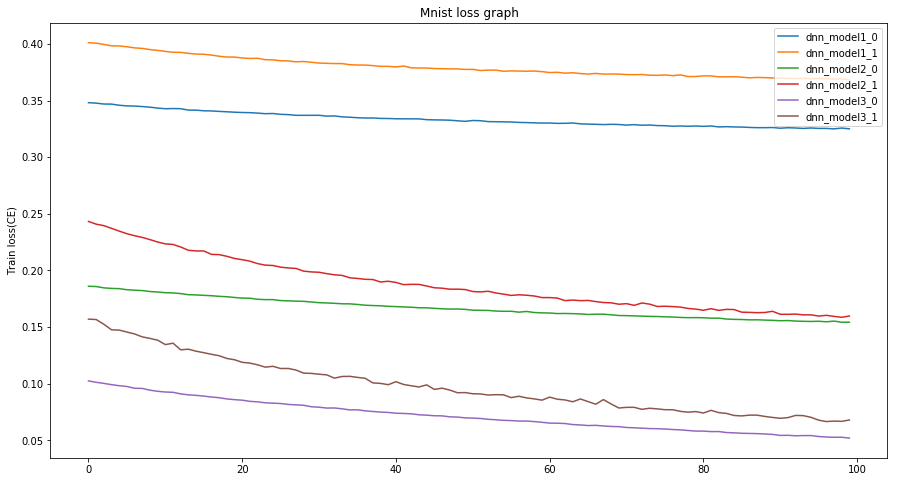

In [45]:
# change for batch_size to 500(128 -> 500) and epoch(50 -> 100)
x = [i for i in range(epochs)]
plt.figure(figsize = (15,8))
plt.title('Mnist loss graph')
plt.plot(x,history1_0.history['loss'],label = 'dnn_model1_0')
plt.plot(x,history1_1.history['loss'],label = 'dnn_model1_1')
plt.plot(x,history2_0.history['loss'],label = 'dnn_model2_0')
plt.plot(x,history2_1.history['loss'],label = 'dnn_model2_1')
plt.plot(x,history3_0.history['loss'],label = 'dnn_model3_0')
plt.plot(x,history3_1.history['loss'],label = 'dnn_model3_1')
plt.ylabel('Train loss(CE)')
plt.legend(loc = 'upper right')
plt.show()

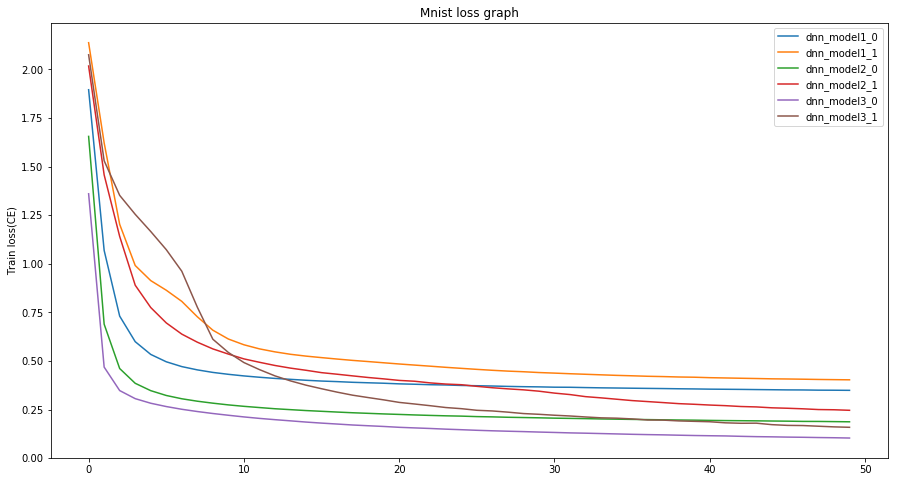

In [43]:
# change for batch_size to 500(128 -> 500)
x = [i for i in range(epochs)]
plt.figure(figsize = (15,8))
plt.title('Mnist loss graph')
plt.plot(x,history1_0.history['loss'],label = 'dnn_model1_0')
plt.plot(x,history1_1.history['loss'],label = 'dnn_model1_1')
plt.plot(x,history2_0.history['loss'],label = 'dnn_model2_0')
plt.plot(x,history2_1.history['loss'],label = 'dnn_model2_1')
plt.plot(x,history3_0.history['loss'],label = 'dnn_model3_0')
plt.plot(x,history3_1.history['loss'],label = 'dnn_model3_1')
plt.ylabel('Train loss(CE)')
plt.legend(loc = 'upper right')
plt.show()

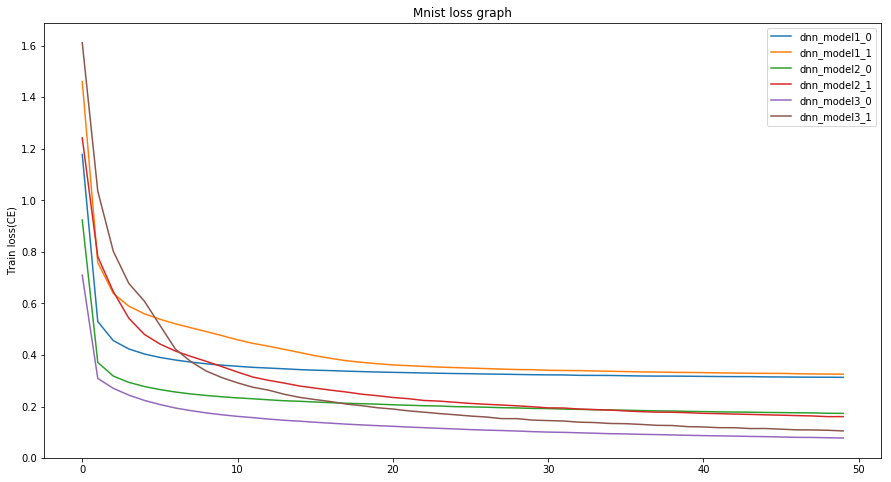

In [37]:
# change for model 2_1
x = [i for i in range(epochs)]
plt.figure(figsize = (15,8))
plt.title('Mnist loss graph')
plt.plot(x,history1_0.history['loss'],label = 'dnn_model1_0')
plt.plot(x,history1_1.history['loss'],label = 'dnn_model1_1')
plt.plot(x,history2_0.history['loss'],label = 'dnn_model2_0')
plt.plot(x,history2_1.history['loss'],label = 'dnn_model2_1')
plt.plot(x,history3_0.history['loss'],label = 'dnn_model3_0')
plt.plot(x,history3_1.history['loss'],label = 'dnn_model3_1')
plt.ylabel('Train loss(CE)')
plt.legend(loc = 'upper right')
plt.show()

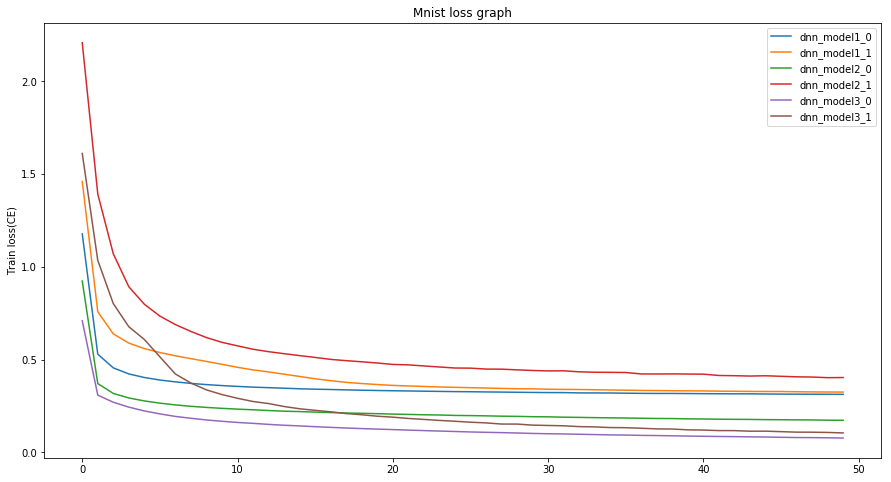

In [10]:
x = [i for i in range(epochs)]
plt.figure(figsize = (15,8))
plt.title('Mnist loss graph')
plt.plot(x,history1_0.history['loss'],label = 'dnn_model1_0')
plt.plot(x,history1_1.history['loss'],label = 'dnn_model1_1')
plt.plot(x,history2_0.history['loss'],label = 'dnn_model2_0')
plt.plot(x,history2_1.history['loss'],label = 'dnn_model2_1')
plt.plot(x,history3_0.history['loss'],label = 'dnn_model3_0')
plt.plot(x,history3_1.history['loss'],label = 'dnn_model3_1')
plt.ylabel('Train loss(CE)')
plt.legend(loc = 'upper right')
plt.show()

### Problem
1. something wrong with hidden layer 

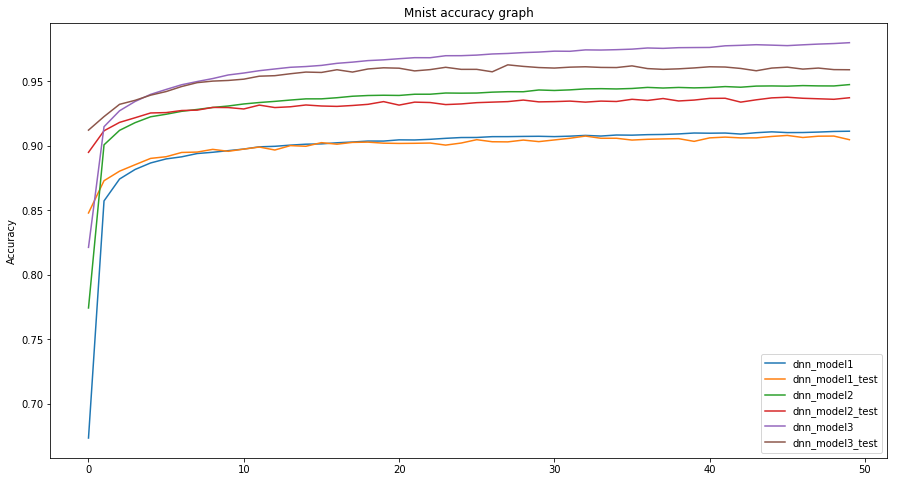

In [11]:
x = [i for i in range(epochs)]
plt.figure(figsize = (15,8))
plt.title('Mnist accuracy graph')
plt.plot(x,history1_0.history['acc'],label = 'dnn_model1')
plt.plot(x,history1_0.history['val_acc'],label = 'dnn_model1_test')
plt.plot(x,history2_0.history['acc'],label = 'dnn_model2')
plt.plot(x,history2_0.history['val_acc'],label = 'dnn_model2_test')
plt.plot(x,history3_0.history['acc'],label = 'dnn_model3')
plt.plot(x,history3_0.history['val_acc'],label = 'dnn_model3_test')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()

### CNN


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [5]:
model1_0 = Sequential()
model1_0.add(Conv2D(filters = 5, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu',input_shape = (28,28,1),kernel_initializer='normal'))
model1_0.add(MaxPool2D(pool_size=(2,2)))
model1_0.add(Flatten())
model1_0.add(Dense(10, activation = "softmax",kernel_initializer='normal'))
print(model1_0.count_params())

model1_1 = Sequential()
model1_1.add(Conv2D(filters = 15, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu',input_shape = (28,28,1),kernel_initializer='normal'))
model1_1.add(MaxPool2D(pool_size=(2,2)))
model1_1.add(Conv2D(filters = 11, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu',kernel_initializer='normal'))
model1_1.add(MaxPool2D(pool_size=(2,2)))
model1_1.add(Flatten())
model1_1.add(Dense(10, activation = "softmax",kernel_initializer='normal'))
print(model1_1.count_params())

9940
9926


In [6]:
model2_0 = Sequential()
model2_0.add(Conv2D(filters = 10, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu',input_shape = (28,28,1),kernel_initializer='normal'))
model2_0.add(MaxPool2D(pool_size=(2,2)))
model2_0.add(Flatten())
model2_0.add(Dense(10, activation = "softmax",kernel_initializer='normal'))
print(model2_0.count_params())

model2_1 = Sequential()
model2_1.add(Conv2D(filters = 19, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu',input_shape = (28,28,1),kernel_initializer='normal'))
model2_1.add(MaxPool2D(pool_size=(2,2)))
model2_1.add(Conv2D(filters = 20, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu',kernel_initializer='normal'))
model2_1.add(MaxPool2D(pool_size=(2,2)))
model2_1.add(Flatten())
model2_1.add(Dense(10, activation = "softmax",kernel_initializer='normal'))
print(model2_1.count_params())

19870
19824


In [7]:
model3_0 = Sequential()
model3_0.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu',input_shape = (28,28,1),kernel_initializer='normal'))
model3_0.add(MaxPool2D(pool_size=(2,2)))
model3_0.add(Flatten())
model3_0.add(Dense(10, activation = "softmax",kernel_initializer='normal'))
print(model3_0.count_params())

model3_1 = Sequential()
model3_1.add(Conv2D(filters = 66, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu',input_shape = (28,28,1),kernel_initializer='normal'))
model3_1.add(MaxPool2D(pool_size=(2,2)))
model3_1.add(Conv2D(filters = 29, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu',kernel_initializer='normal'))
model3_1.add(MaxPool2D(pool_size=(2,2)))
model3_1.add(Flatten())
model3_1.add(Dense(10, activation = "softmax",kernel_initializer='normal'))
print(model3_1.count_params())

63562
63815


In [8]:
model1_0.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model1_1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model2_0.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model2_1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model3_0.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model3_1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
start = time.time()
batch_size = 128
epochs = 50
history1_0 = model1_0.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
history1_1 = model1_1.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
history2_0 = model2_0.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
history2_1 = model2_1.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
history3_0 = model3_0.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
history3_1 = model3_1.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
end = time.time()
print((end - start)/60)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 27us/step - loss: 1.3136 - acc: 0.8468 - val_loss: 0.1858 - val_acc: 0.9479
Epoch 2/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.1453 - acc: 0.9569 - val_loss: 0.1168 - val_acc: 0.9646
Epoch 3/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.1000 - acc: 0.9700 - val_loss: 0.0975 - val_acc: 0.9710
Epoch 4/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.0808 - acc: 0.9758 - val_loss: 0.0908 - val_acc: 0.9729
Epoch 5/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.0712 - acc: 0.9788 - val_loss: 0.0864 - val_acc: 0.9764
Epoch 6/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.0644 - acc: 0.9800 - val_loss: 0.0878 - val_acc: 0.9774
Epoch 7/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.0593 - acc: 0.9806 - val_loss: 0.0820 - val_acc

Epoch 10/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.0291 - acc: 0.9906 - val_loss: 0.0578 - val_acc: 0.9854
Epoch 11/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.0277 - acc: 0.9914 - val_loss: 0.0547 - val_acc: 0.9858
Epoch 12/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.0247 - acc: 0.9922 - val_loss: 0.0598 - val_acc: 0.9847
Epoch 13/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.0233 - acc: 0.9924 - val_loss: 0.0681 - val_acc: 0.9849
Epoch 14/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.0239 - acc: 0.9927 - val_loss: 0.0654 - val_acc: 0.9847
Epoch 15/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.0226 - acc: 0.9930 - val_loss: 0.0668 - val_acc: 0.9854
Epoch 16/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.0228 - acc: 0.9928 - val_loss: 0.0661 - val_acc: 0.9860
Epoch 17/50
60000/60000 [=========

60000/60000 [==============================] - 1s 14us/step - loss: 0.0231 - acc: 0.9934 - val_loss: 0.1622 - val_acc: 0.9763
Epoch 20/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.0256 - acc: 0.9928 - val_loss: 0.1655 - val_acc: 0.9747
Epoch 21/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.0256 - acc: 0.9931 - val_loss: 0.1634 - val_acc: 0.9773
Epoch 22/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.0226 - acc: 0.9935 - val_loss: 0.1703 - val_acc: 0.9771
Epoch 23/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.0245 - acc: 0.9936 - val_loss: 0.1799 - val_acc: 0.9733
Epoch 24/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.0198 - acc: 0.9947 - val_loss: 0.1899 - val_acc: 0.9762
Epoch 25/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.0238 - acc: 0.9939 - val_loss: 0.1900 - val_acc: 0.9768
Epoch 26/50
60000/60000 [=====================

60000/60000 [==============================] - 1s 18us/step - loss: 1.6200 - acc: 0.8989 - val_loss: 1.7530 - val_acc: 0.8902
Epoch 38/50
60000/60000 [==============================] - 1s 18us/step - loss: 1.6285 - acc: 0.8984 - val_loss: 1.7123 - val_acc: 0.8932
Epoch 39/50
60000/60000 [==============================] - 1s 18us/step - loss: 1.6129 - acc: 0.8995 - val_loss: 1.6897 - val_acc: 0.8948
Epoch 40/50
60000/60000 [==============================] - 1s 18us/step - loss: 1.6257 - acc: 0.8987 - val_loss: 1.6901 - val_acc: 0.8943
Epoch 41/50
60000/60000 [==============================] - 1s 18us/step - loss: 1.6169 - acc: 0.8993 - val_loss: 1.6529 - val_acc: 0.8969
Epoch 42/50
60000/60000 [==============================] - 1s 18us/step - loss: 1.6119 - acc: 0.8995 - val_loss: 1.7068 - val_acc: 0.8935
Epoch 43/50
60000/60000 [==============================] - 1s 18us/step - loss: 1.6069 - acc: 0.8999 - val_loss: 1.6878 - val_acc: 0.8947
Epoch 44/50
60000/60000 [=====================

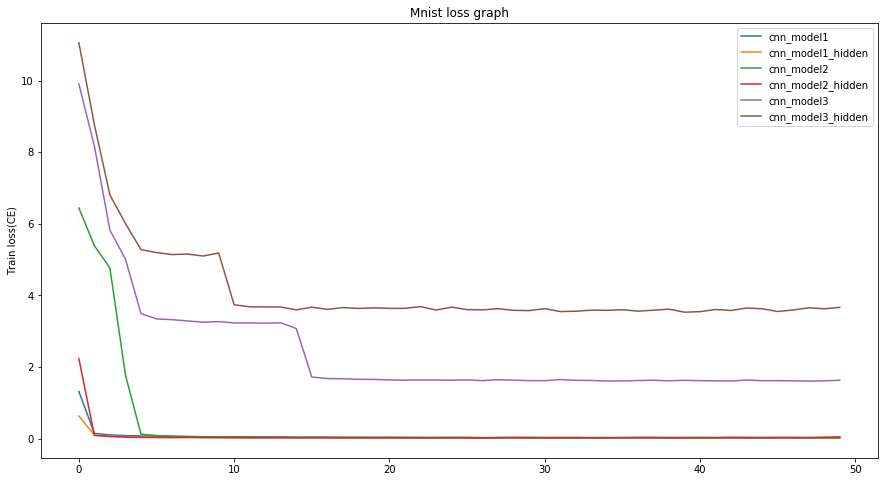

In [10]:
x = [i for i in range(epochs)]
plt.figure(figsize = (15,8))
plt.title('Mnist loss graph')
plt.plot(x,history1_0.history['loss'],label = 'cnn_model1')
plt.plot(x,history1_1.history['loss'],label = 'cnn_model1_hidden')
plt.plot(x,history2_0.history['loss'],label = 'cnn_model2')
plt.plot(x,history2_1.history['loss'],label = 'cnn_model2_hidden')
plt.plot(x,history3_0.history['loss'],label = 'cnn_model3')
plt.plot(x,history3_1.history['loss'],label = 'cnn_model3_hidden')
plt.ylabel('Train loss(CE)')
plt.legend(loc = 'upper right')
plt.show()

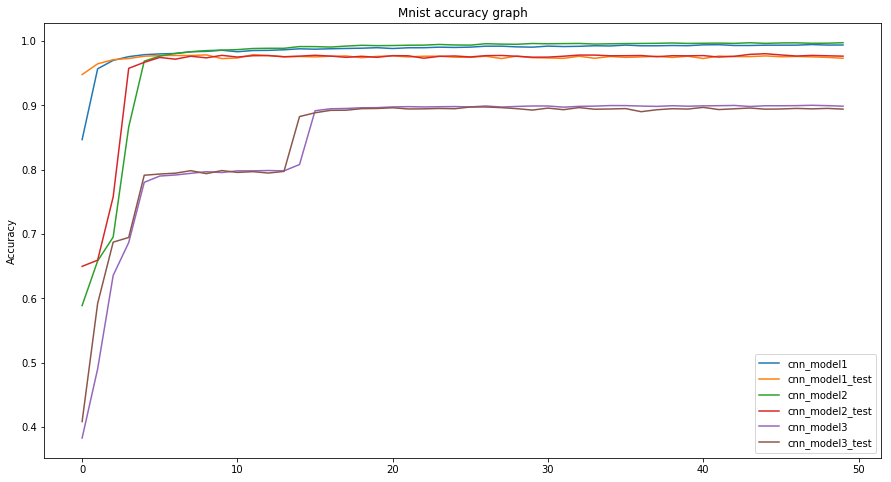

In [11]:
x = [i for i in range(epochs)]
plt.figure(figsize = (15,8))
plt.title('Mnist accuracy graph')
plt.plot(x,history1_0.history['acc'],label = 'cnn_model1')
plt.plot(x,history1_0.history['val_acc'],label = 'cnn_model1_test')
plt.plot(x,history2_0.history['acc'],label = 'cnn_model2')
plt.plot(x,history2_0.history['val_acc'],label = 'cnn_model2_test')
plt.plot(x,history3_0.history['acc'],label = 'cnn_model3')
plt.plot(x,history3_0.history['val_acc'],label = 'cnn_model3_test')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()

### Problem
1. model1 is better than model2 and model3,but model1 has the least parameters
2. something wrong with model3 

# CIFAR10

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# x_train /= 255
# x_test /= 255
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(50000, 32, 32, 3) train samples
(10000, 32, 32, 3) test samples


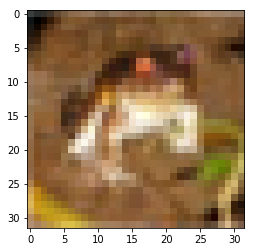

In [17]:
imshow(x_train[0])

In [3]:
x_train = x_train/255
x_test = x_test/255
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [4]:
model1_0 = Sequential()
model1_0.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu',input_shape = (32,32,3),kernel_initializer='normal'))
model1_0.add(MaxPool2D(pool_size=(2,2)))
model1_0.add(Flatten())
model1_0.add(Dense(10, activation = "softmax",kernel_initializer='normal'))
print(model1_0.count_params())

model1_1 = Sequential()
model1_1.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu',input_shape = (32,32,3),kernel_initializer='normal'))
model1_1.add(MaxPool2D(pool_size=(2,2)))
model1_1.add(Conv2D(filters = 40, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu',kernel_initializer='normal'))
model1_1.add(MaxPool2D(pool_size=(2,2)))
model1_1.add(Flatten())
model1_1.add(Dense(10, activation = "softmax",kernel_initializer='normal'))
print(model1_1.count_params())

42186
42866


In [5]:
model2_0 = Sequential()
model2_0.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu',input_shape = (32,32,3),kernel_initializer='normal'))
model2_0.add(MaxPool2D(pool_size=(2,2)))
model2_0.add(Flatten())
model2_0.add(Dense(10, activation = "softmax",kernel_initializer='normal'))
print(model2_0.count_params())

model2_1 = Sequential()
model2_1.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
               activation ='relu',input_shape = (32,32,3),kernel_initializer='normal'))
model2_1.add(MaxPool2D(pool_size=(2,2)))
model2_1.add(Conv2D(filters = 57, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu',kernel_initializer='normal'))
model2_1.add(MaxPool2D(pool_size=(2,2)))
model2_1.add(Flatten())
model2_1.add(Dense(10, activation = "softmax",kernel_initializer='normal'))
print(model2_1.count_params())

84362
84579


In [6]:
model3_0 = Sequential()
model3_0.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu',input_shape = (32,32,3),kernel_initializer='normal'))
model3_0.add(MaxPool2D(pool_size=(2,2)))
model3_0.add(Flatten())
model3_0.add(Dense(10, activation = "softmax",kernel_initializer='normal'))
print(model3_0.count_params())

model3_1 = Sequential()
model3_1.add(Conv2D(filters = 76, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu',input_shape = (32,32,3),kernel_initializer='normal'))
model3_1.add(MaxPool2D(pool_size=(2,2)))
model3_1.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu',kernel_initializer='normal'))
model3_1.add(MaxPool2D(pool_size=(2,2)))
model3_1.add(Flatten())
model3_1.add(Dense(10, activation = "softmax",kernel_initializer='normal'))
print(model3_1.count_params())

168714
168410


In [7]:
model1_0.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model1_1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model2_0.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model2_1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model3_0.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model3_1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
start = time.time()
batch_size = 128
epochs = 50
history1_0 = model1_0.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
history1_1 = model1_1.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
history2_0 = model2_0.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
history2_1 = model2_1.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
history3_0 = model3_0.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
history3_1 = model3_1.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
end = time.time()
print((end - start)/60)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.6673 - acc: 0.4136 - val_loss: 1.4759 - val_acc: 0.4785
Epoch 2/50
50000/50000 [==============================] - 2s 33us/step - loss: 1.3629 - acc: 0.5230 - val_loss: 1.3106 - val_acc: 0.5419
Epoch 3/50
50000/50000 [==============================] - 2s 33us/step - loss: 1.2618 - acc: 0.5630 - val_loss: 1.2693 - val_acc: 0.5556
Epoch 4/50
50000/50000 [==============================] - 2s 33us/step - loss: 1.1963 - acc: 0.5851 - val_loss: 1.2407 - val_acc: 0.5625
Epoch 5/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.1433 - acc: 0.6046 - val_loss: 1.1805 - val_acc: 0.5889
Epoch 6/50
50000/50000 [==============================] - 2s 33us/step - loss: 1.1045 - acc: 0.6158 - val_loss: 1.1722 - val_acc: 0.5840
Epoch 7/50
50000/50000 [==============================] - 2s 34us/step - loss: 1.0736 - acc: 0.6303 - val_loss: 1.1455 - val_acc

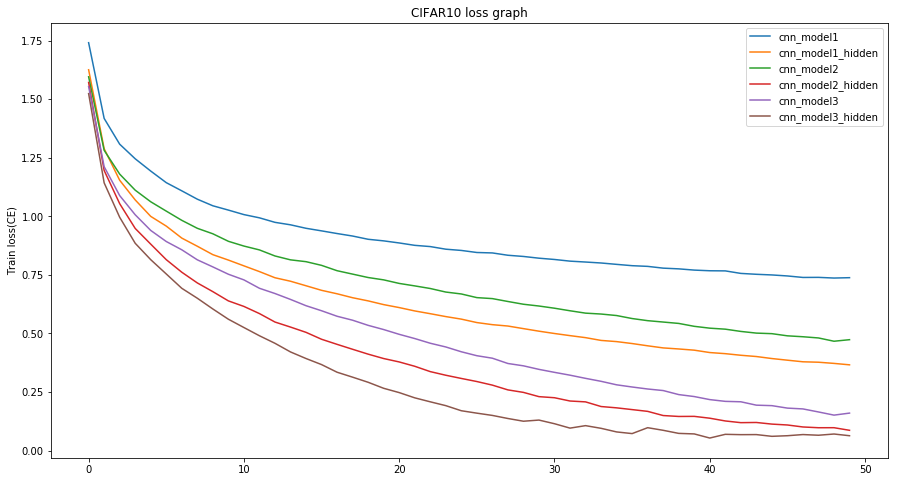

In [60]:
x = [i for i in range(epochs)]
plt.figure(figsize = (15,8))
plt.title('CIFAR10 loss graph')
plt.plot(x,history1_0.history['loss'],label = 'cnn_model1')
plt.plot(x,history1_1.history['loss'],label = 'cnn_model1_hidden')
plt.plot(x,history2_0.history['loss'],label = 'cnn_model2')
plt.plot(x,history2_1.history['loss'],label = 'cnn_model2_hidden')
plt.plot(x,history3_0.history['loss'],label = 'cnn_model3')
plt.plot(x,history3_1.history['loss'],label = 'cnn_model3_hidden')
plt.ylabel('Train loss(CE)')
plt.legend(loc = 'upper right')
plt.show()

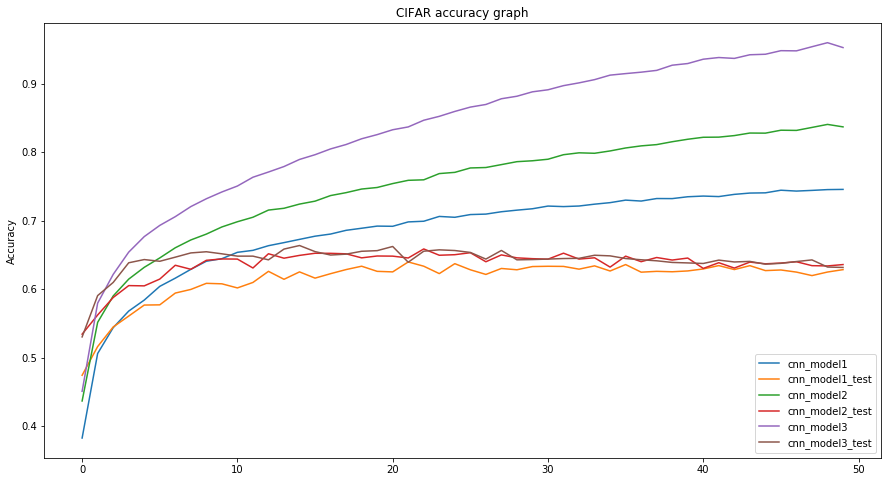

In [61]:
x = [i for i in range(epochs)]
plt.figure(figsize = (15,8))
plt.title('CIFAR accuracy graph')
plt.plot(x,history1_0.history['acc'],label = 'cnn_model1')
plt.plot(x,history1_0.history['val_acc'],label = 'cnn_model1_test')
plt.plot(x,history2_0.history['acc'],label = 'cnn_model2')
plt.plot(x,history2_0.history['val_acc'],label = 'cnn_model2_test')
plt.plot(x,history3_0.history['acc'],label = 'cnn_model3')
plt.plot(x,history3_0.history['val_acc'],label = 'cnn_model3_test')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()

### Problem
1. overfitting